# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Note**: This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code and results.

## Overview of Dandiset

Dandiset: https://dandiarchive.org/dandiset/001361/0.250406.0045

This Dandiset contains two-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data are part of the study "A flexible hippocampal population code for experience relative to reward." 

## Notebook Contents

1. Load Dandiset metadata and list assets  
2. Load an NWB file from the Dandiset  
3. Inspect NWB file metadata and structure  
4. Visualize behavioral timeseries (position)  
5. Visualize example ROI fluorescence  
6. Summary and future directions

## Required Packages

- dandi (DandiAPIClient)  
- itertools (islice)  
- pynwb  
- h5py  
- remfile  
- matplotlib  
- numpy

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

## 1. Load Dandiset Metadata and List Assets

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset DOI/Citation: {metadata['citation']}")
dandiset_url = "https://dandiarchive.org/dandiset/001361/0.250406.0045"
print(f"Dandiset URL: {dandiset_url}")

assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset DOI/Citation: Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025) A flexible hippocampal population code for experience relative to reward (Version 0.250406.0045) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001361/0.250406.0045
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## 2. Load an NWB File

We choose the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb` for illustration.

- **Asset ID**: `d77ea78a-8978-461d-9d11-3c5cef860d82`  
- **Download URL**: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Metadata

- Session description: `nwb.session_description`  
- Identifier: `nwb.identifier`  
- Session start time: `nwb.session_start_time`  
- Experimenter(s): `nwb.experimenter`  
- Subject: `nwb.subject.subject_id`, `nwb.subject.species`, `nwb.subject.sex`

In [4]:
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter(s): {nwb.experimenter}")
print(f"Subject ID: {nwb.subject.subject_id}, Species: {nwb.subject.species}, Sex: {nwb.subject.sex}")

Session description: processed suite2p data
Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session start time: 2023-02-23 00:00:00-08:00
Experimenter(s): ('Mari Sosa',)
Subject ID: m11, Species: Mus musculus, Sex: M


## 3. NWB File Structure

```text
acquisition/
└─ TwoPhotonSeries (imaging data)
processing/
├─ behavior/
│  └─ BehavioralTimeSeries (position, speed, etc.)
└─ ophys/
   ├─ Deconvolved (roi fluorescence)
   ├─ Fluorescence (roi fluorescence)
   ├─ Neuropil (neuropil fluorescence)
   └─ ImageSegmentation (ROI masks and metadata)
devices/
imaging_planes/
subject/
```

**NeuroSift link**:  
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft

## 4. Visualize Behavioral Timeseries (Position)

Load a subset of position data to avoid streaming the full dataset.

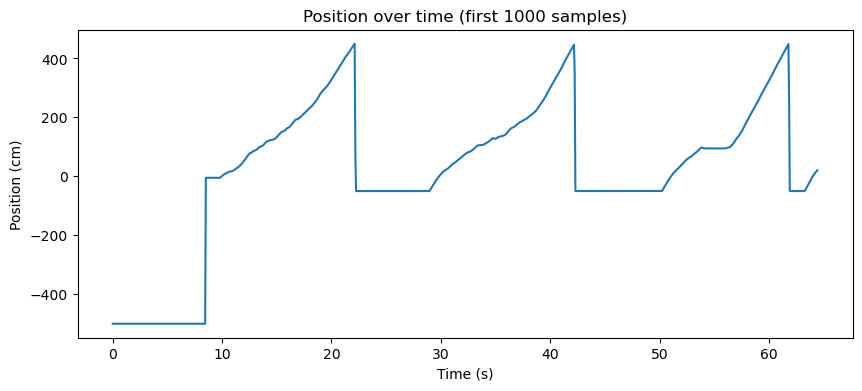

In [5]:
behavior_ts = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"]
position_ts = behavior_ts.time_series["position"]
times = position_ts.timestamps[:1000]
position = position_ts.data[:1000]

plt.figure(figsize=(10,4))
plt.plot(times, position, color='tab:blue')
plt.xlabel("Time (s)")
plt.ylabel("Position (cm)")
plt.title("Position over time (first 1000 samples)")
plt.show()

## 5. Visualize Example ROI Fluorescence

Plot the fluorescence of the first ROI (plane0) over the first 500 time points.

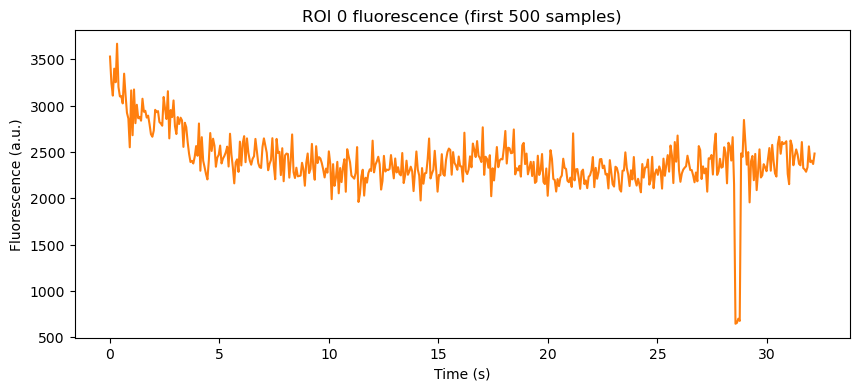

In [6]:
fluo = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["plane0"]
roi0 = fluo.data[:, 0]
t0 = fluo.starting_time
rate = fluo.rate
times_f = t0 + np.arange(500) / rate
roi0_f = roi0[:500]

plt.figure(figsize=(10,4))
plt.plot(times_f, roi0_f, color='tab:orange')
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (a.u.)")
plt.title("ROI 0 fluorescence (first 500 samples)")
plt.show()

## 6. Summary and Future Directions

This notebook demonstrated how to:
- Access Dandiset metadata and assets via the Dandi API  
- Load remote NWB files using PyNWB and remfile  
- Inspect NWB file metadata and structure  
- Visualize behavioral and optical physiology data  

**Future directions** could include:
- Correlating neural activity with behavioral events  
- Comparing responses across ROIs or sessions  
- Exploring segmentation masks for ROI validation  
- Integrating additional processing modules or event series